In [58]:
library(caret)
library(datasets)
library(mlbench)
library(ggplot2)

ERROR: Error in install.packages(mlbench): objeto 'mlbench' não encontrado


In [3]:
df <- read.csv(file="E:\\1.DATA_ANALYTICS\\17-Analise Preditiva Avançada\\Exercicio_1\\BostonRealEstate_Exercise.csv", header=TRUE, sep=",")

In [5]:
summary(df)

     NBATH            CRIM            NROOMS           TAX        
 Min.   :1.000   Min.   :0.0000   Min.   :2.000   Min.   : 17.68  
 1st Qu.:1.000   1st Qu.:0.4600   1st Qu.:3.000   1st Qu.: 46.51  
 Median :3.000   Median :0.6650   Median :5.000   Median : 59.52  
 Mean   :2.152   Mean   :0.6122   Mean   :4.011   Mean   : 60.21  
 3rd Qu.:3.000   3rd Qu.:0.8000   3rd Qu.:5.000   3rd Qu.: 73.72  
 Max.   :3.000   Max.   :0.9600   Max.   :5.000   Max.   :100.00  
      DISC             AGE             PRICE       
 Min.   : 50.52   Min.   :  1.00   Min.   : 49.61  
 1st Qu.:122.54   1st Qu.: 13.00   1st Qu.:111.75  
 Median :161.51   Median : 26.00   Median :138.50  
 Mean   :166.32   Mean   : 35.03   Mean   :143.92  
 3rd Qu.:204.12   3rd Qu.: 55.00   3rd Qu.:170.78  
 Max.   :419.95   Max.   :100.00   Max.   :387.94  

In [8]:
set.seed(987)
trainIndex <- createDataPartition(df$PRICE, p = .7, list = FALSE)

In [14]:
dfTrain <- df[ trainIndex,]
dfTest  <- df[-trainIndex,]

In [18]:
set.seed(987)
model_mult <- train(PRICE~., data = dfTrain ,method = "lm")

In [19]:
model_mult

Linear Regression 

586 samples
  6 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 586, 586, 586, 586, 586, 586, ... 
Resampling results:

  RMSE     Rsquared   MAE     
  22.4091  0.7987478  16.78837

Tuning parameter 'intercept' was held constant at a value of TRUE

loess r-squared variable importance

       Overall
DISC   0.75253
CRIM   0.33599
TAX    0.13140
AGE    0.06662
NBATH  0.02561
NROOMS 0.02137

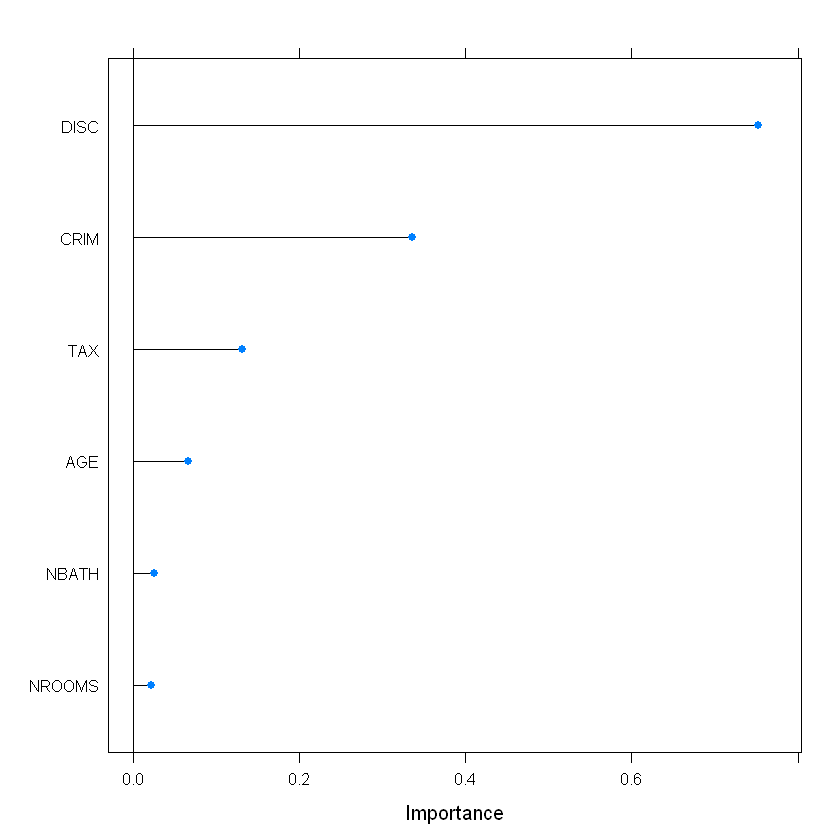

In [20]:
imp <- varImp(model_mult ,useModel=FALSE, scale=FALSE)
imp
plot(imp)

In [21]:
y_Model <- predict(model_mult, dfTest)
dfTest$Model <- y_Model
head(dfTest)

,NBATH,CRIM,NROOMS,TAX,DISC,AGE,PRICE,Model
,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
5,1,0.73,3,39.79,161.36,15,145.42,139.1835
8,1,0.09,2,17.89,205.06,17,174.00,192.1363
10,1,0.59,2,35.40,132.91,26,124.78,130.8994
15,1,0.87,3,59.55,181.34,40,149.41,154.8124
18,3,0.75,5,89.46,130.44,89,130.44,128.7806
19,1,0.64,2,65.00,182.27,2,109.14,142.3977


In [55]:
data <- data.frame(CRIM=0.71,NROOMS=2,AGE=63,DISC=101.24,NBATH=1,TAX=65.4)
y_Model <- predict(model_mult, data)
data$modelo <- y_Model
head(data)


CRIM,NROOMS,AGE,DISC,NBATH,TAX,modelo
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.71,2,63,101.24,1,65.4,113.2732


In [49]:
dfTrain$AGE2 <- dfTrain$AGE^2
set.seed(987)
model_mult2 <- train(PRICE~., data = dfTrain ,method = "lm")

In [50]:
model_mult2

Linear Regression 

586 samples
  7 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 586, 586, 586, 586, 586, 586, ... 
Resampling results:

  RMSE      Rsquared   MAE    
  21.23936  0.8190131  15.7996

Tuning parameter 'intercept' was held constant at a value of TRUE

loess r-squared variable importance

       Overall
DISC   0.75253
CRIM   0.33599
TAX    0.13140
AGE2   0.09494
AGE    0.06662
NBATH  0.02561
NROOMS 0.02137

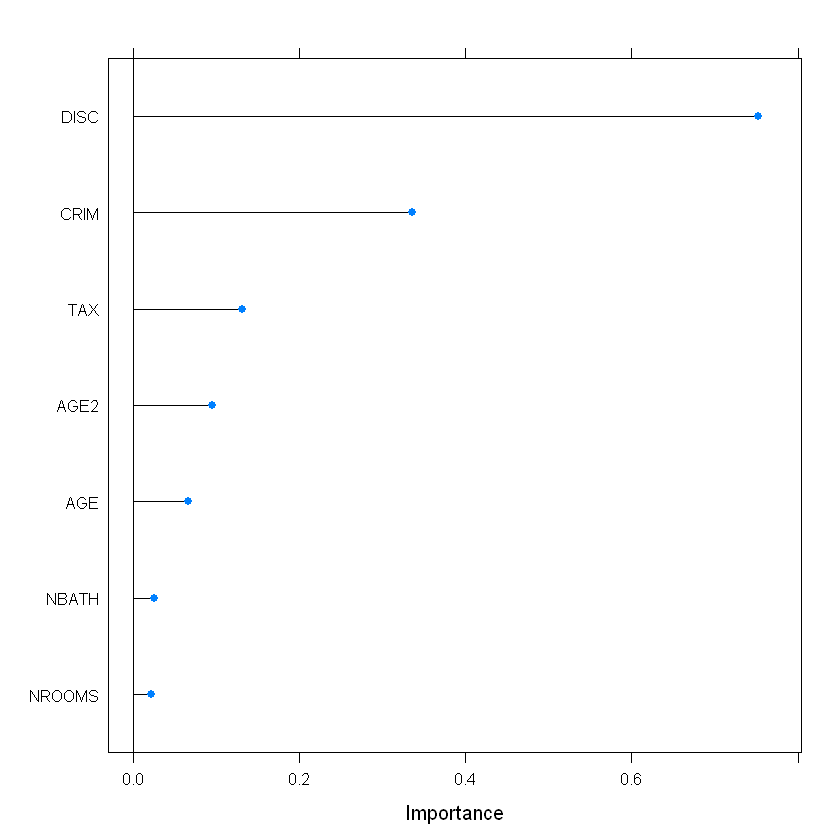

In [51]:
imp <- varImp(model_mult2 ,useModel=FALSE, scale=FALSE)
imp
plot(imp)

In [56]:
data2 <- data.frame(CRIM=0.71,NROOMS=2,AGE=63,AGE2=63^2,DISC=101.24,NBATH=1,TAX=65.4)
y_Model <- predict(model_mult2, data2)
data2$modelo <- y_Model
head(data2)

CRIM,NROOMS,AGE,AGE2,DISC,NBATH,TAX,modelo
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.71,2,63,3969,101.24,1,65.4,121.4647
